In [1]:
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the path to your CSV file in Google Drive
# Make sure to replace 'My Drive' with the actual path if it's nested
file_path = '/content/drive/My Drive/FINAL_DATASET.csv'

# Read the CSV file into a pandas DataFrame
try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully!")
    print(df.head())
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please check the path and ensure it exists in your Google Drive.")
except Exception as e:
    print(f"An error occurred: {e}")

Mounted at /content/drive


/tmp/ipython-input-445412663.py:13: DtypeWarning: Columns (76,77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Dataset loaded successfully!
   Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate Reporting_Airline  \
0  2015        3      8           3          1  2015-08-03                WN   
1  2015        3      8           3          1  2015-08-03                WN   
2  2015        3      8           3          1  2015-08-03                WN   
3  2015        3      8           3          1  2015-08-03                WN   
4  2015        3      8           3          1  2015-08-03                WN   

   DOT_ID_Reporting_Airline IATA_CODE_Reporting_Airline Tail_Number  ...  \
0                     19393                          WN      N7743B  ...   
1                     19393                          WN      N525SW  ...   
2                     19393                          WN      N528SW  ...   
3                     19393                          WN      N523SW  ...   
4                     19393                          WN      N515SW  ...   

   tavg  tmin  tmax  prcp snow wd

In [2]:
for feature in df.columns.tolist():
  print(feature)




Year
Quarter
Month
DayofMonth
DayOfWeek
FlightDate
Reporting_Airline
DOT_ID_Reporting_Airline
IATA_CODE_Reporting_Airline
Tail_Number
Flight_Number_Reporting_Airline
OriginAirportID
OriginAirportSeqID
OriginCityMarketID
Origin
OriginCityName
OriginState
OriginStateFips
OriginStateName
OriginWac
DestAirportID
DestAirportSeqID
DestCityMarketID
Dest
DestCityName
DestState
DestStateFips
DestStateName
DestWac
CRSDepTime
DepTime
DepDelay
DepDelayMinutes
DepDel15
DepartureDelayGroups
DepTimeBlk
TaxiOut
WheelsOff
WheelsOn
TaxiIn
CRSArrTime
ArrTime
ArrDelay
ArrDelayMinutes
ArrDel15
ArrivalDelayGroups
ArrTimeBlk
Cancelled
CancellationCode
Diverted
CRSElapsedTime
ActualElapsedTime
AirTime
Flights
Distance
DistanceGroup
CarrierDelay
WeatherDelay
NASDelay
SecurityDelay
LateAircraftDelay
FirstDepTime
TotalAddGTime
LongestAddGTime
DivAirportLandings
DivReachedDest
DivActualElapsedTime
DivArrDelay
DivDistance
Div1Airport
Div1AirportID
Div1AirportSeqID
Div1WheelsOn
Div1TotalGTime
Div1LongestGTime
Div1W

In [3]:
print(df['CancellationCode'].value_counts())

CancellationCode
A    30511
B    26722
D    24029
C     5091
Name: count, dtype: int64


In [4]:
# Identify rows where 'Cancelled' is 1 (indicating a cancellation) and 'CancellationCode' is NaN
rows_to_remove = df[(df['Cancelled'] == 1) & (df['CancellationCode'].isna())]

# Count the number of rows to be removed
num_removed = len(rows_to_remove)

# Remove these rows from the DataFrame
df = df.drop(rows_to_remove.index)

print(f"Removed {num_removed} rows where a flight was cancelled but had no CancellationCode.")
print("Displaying the head of the updated DataFrame:")
df

Removed 0 rows where a flight was cancelled but had no CancellationCode.
Displaying the head of the updated DataFrame:


,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,2015,3,8,3,1,2015-08-03,WN,19393,WN,N7743B,...,27.4,21.7,34.4,0.0,0.0,NaN,16.9,NaN,1010.1,NaN
1,2015,3,8,3,1,2015-08-03,WN,19393,WN,N525SW,...,27.4,21.7,34.4,0.0,0.0,NaN,16.9,NaN,1010.1,NaN
2,2015,3,8,3,1,2015-08-03,WN,19393,WN,N528SW,...,27.4,21.7,34.4,0.0,0.0,NaN,16.9,NaN,1010.1,NaN
3,2015,3,8,3,1,2015-08-03,WN,19393,WN,N523SW,...,27.4,21.7,34.4,0.0,0.0,NaN,16.9,NaN,1010.1,NaN
4,2015,3,8,3,1,2015-08-03,WN,19393,WN,N515SW,...,27.4,21.7,34.4,0.0,0.0,NaN,16.9,NaN,1010.1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4502068,2025,3,7,30,3,2025-07-30,WN,19393,WN,N8737L,...,29.8,21.1,38.3,0.0,0.0,NaN,11.2,NaN,1015.2,NaN
4502069,2025,3,7,30,3,2025-07-30,WN,19393,WN,N567WN,...,29.8,21.1,38.3,0.0,0.0,NaN,11.2,NaN,1015.2,NaN
4502070,2025,3,7,30,3,2025-07-30,WN,19393,WN,N966WN,...,29.8,21.1,38.3,0.0,0.0,NaN,11.2,NaN,1015.2,NaN
4502071,2025,3,7,30,3,2025-07-30,WN,19393,WN,N8611F,...,29.8,21.1,38.3,0.0,0.0,NaN,11.2,NaN,1015.2,NaN


In [7]:
df['weatherCancellation'] = (df['Cancelled'] == 1) & (df['CancellationCode'] == 'B')
print(df[['Cancelled', 'CancellationCode', 'weatherCancellation']].head())
print(df['weatherCancellation'].value_counts())

   Cancelled CancellationCode  weatherCancellation
0        0.0              NaN                False
1        0.0              NaN                False
2        0.0              NaN                False
3        0.0              NaN                False
4        0.0              NaN                False
weatherCancellation
False    4475351
True       26722
Name: count, dtype: int64


# Task
Explore the data types, unique values, and missing values for the weather-related columns (`tavg`, `tmin`, `tmax`, `prcp`, `snow`, `wdir`, `wspd`, `wpgt`, `pres`, `tsun`) in the DataFrame to prepare for visualization.

## Explore Weather Columns

### Subtask:
Examine the data types, unique values, and missing values for identified weather-related columns (`tavg`, `tmin`, `tmax`, `prcp`, `snow`, `wdir`, `wspd`, `wpgt`, `pres`, `tsun`) to determine the best visualization strategy. This will help us understand their distributions and handle any missing data appropriately before plotting.


**Reasoning**:
To understand the characteristics of the weather-related columns as requested, I will create a list of these columns, then print their data types, the count of unique values, the number of missing values, and the percentage of missing values for each.



In [8]:
weather_columns = ['tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'wpgt', 'pres', 'tsun']

print("--- Data Types ---")
print(df[weather_columns].dtypes)
print("\n--- Unique Values ---")
for col in weather_columns:
    print(f"'{col}': {df[col].nunique()} unique values")

print("\n--- Missing Values ---")
for col in weather_columns:
    missing_count = df[col].isnull().sum()
    missing_percentage = (missing_count / len(df)) * 100
    print(f"'{col}': {missing_count} missing values ({missing_percentage:.2f}%) ")

--- Data Types ---
tavg    float64
tmin    float64
tmax    float64
prcp    float64
snow    float64
wdir    float64
wspd    float64
wpgt    float64
pres    float64
tsun    float64
dtype: object

--- Unique Values ---
'tavg': 543 unique values
'tmin': 208 unique values
'tmax': 196 unique values
'prcp': 556 unique values
'snow': 13 unique values
'wdir': 0 unique values
'wspd': 413 unique values
'wpgt': 3 unique values
'pres': 455 unique values
'tsun': 1 unique values

--- Missing Values ---
'tavg': 11 missing values (0.00%) 
'tmin': 404 missing values (0.01%) 
'tmax': 404 missing values (0.01%) 
'prcp': 20624 missing values (0.46%) 
'snow': 2540630 missing values (56.43%) 
'wdir': 4502073 missing values (100.00%) 
'wspd': 38 missing values (0.00%) 
'wpgt': 4501603 missing values (99.99%) 
'pres': 3302 missing values (0.07%) 
'tsun': 4502060 missing values (100.00%) 


**Reasoning**:
Based on the previous analysis, `wdir`, `wpgt`, and `tsun` columns have a very high percentage of missing values (close to 100%). These columns are unlikely to provide any useful information for visualization or modeling, so it's best to drop them to clean the dataset.



In [11]:
columns_to_drop = ['wdir', 'wpgt', 'tsun']

# Filter columns_to_drop to only include those that still exist in the DataFrame
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]

if existing_columns_to_drop:
    df = df.drop(columns=existing_columns_to_drop)
    print(f"Dropped columns: {existing_columns_to_drop}")
else:
    print("No specified columns to drop were found in the DataFrame (they might have been dropped already).")

# Update weather_columns by removing the dropped columns (regardless of whether they were dropped in this step or previously)
weather_columns = [col for col in weather_columns if col not in columns_to_drop]
print(f"Remaining weather columns: {weather_columns}")

No specified columns to drop were found in the DataFrame (they might have been dropped already).
Remaining weather columns: ['tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wspd', 'pres']


**Reasoning**:
Now that columns with excessive missing values have been removed and the `weather_columns` list updated, I will re-examine the data types, unique values, and missing values for the remaining weather-related columns. This will provide a clearer picture of their characteristics and help determine the next steps for data cleaning and visualization.



In [12]:
print("--- Data Types for remaining weather columns ---")
print(df[weather_columns].dtypes)
print("\n--- Unique Values for remaining weather columns ---")
for col in weather_columns:
    print(f"'{col}': {df[col].nunique()} unique values")

print("\n--- Missing Values for remaining weather columns ---")
for col in weather_columns:
    missing_count = df[col].isnull().sum()
    missing_percentage = (missing_count / len(df)) * 100
    print(f"'{col}': {missing_count} missing values ({missing_percentage:.2f}%) ")

--- Data Types for remaining weather columns ---
tavg    float64
tmin    float64
tmax    float64
prcp    float64
snow    float64
wspd    float64
pres    float64
dtype: object

--- Unique Values for remaining weather columns ---
'tavg': 543 unique values
'tmin': 208 unique values
'tmax': 196 unique values
'prcp': 556 unique values
'snow': 13 unique values
'wspd': 413 unique values
'pres': 455 unique values

--- Missing Values for remaining weather columns ---
'tavg': 11 missing values (0.00%) 
'tmin': 404 missing values (0.01%) 
'tmax': 404 missing values (0.01%) 
'prcp': 20624 missing values (0.46%) 
'snow': 2540630 missing values (56.43%) 
'wspd': 38 missing values (0.00%) 
'pres': 3302 missing values (0.07%) 


**Reasoning**:
The 'snow' column still has a high percentage of missing values (56.43%). To determine the best strategy for handling these missing values (e.g., imputation or interpreting NaN as 0), I need to examine the distribution of its non-missing values. This will inform whether NaNs can be reasonably considered as zero snow or if a more complex imputation method is required.



In [13]:
print("--- Value Counts for 'snow' (excluding NaNs) ---")
print(df['snow'].value_counts(normalize=True).head())

--- Value Counts for 'snow' (excluding NaNs) ---
snow
0.0     0.997700
3.0     0.000965
5.0     0.000467
8.0     0.000344
10.0    0.000299
Name: proportion, dtype: float64


**Reasoning**:
Given that over 99.7% of the non-missing 'snow' values are 0.0, it is highly probable that the missing values (NaNs) also represent instances of no snow. Therefore, imputing the missing values in the 'snow' column with 0 is a reasonable and practical approach to handle this missing data.



In [14]:
df['snow'] = df['snow'].fillna(0)
print("Missing values in 'snow' after imputation:")
print(df['snow'].isnull().sum())

Missing values in 'snow' after imputation:
0


**Reasoning**:
Now that the 'snow' column has been handled, I will address the remaining columns with a small percentage of missing values ('tavg', 'tmin', 'tmax', 'prcp', 'wspd', 'pres'). Given the low percentages, mean imputation is a suitable strategy to fill these missing values.



In [15]:
for col in ['tavg', 'tmin', 'tmax', 'prcp', 'wspd', 'pres']:
    if df[col].isnull().sum() > 0:
        mean_value = df[col].mean()
        df[col] = df[col].fillna(mean_value)
        print(f"Missing values in '{col}' after mean imputation: {df[col].isnull().sum()}")

print("\nAll missing values in weather-related columns after imputation:")
for col in weather_columns:
    print(f"'{col}': {df[col].isnull().sum()} missing values")

Missing values in 'tavg' after mean imputation: 0
Missing values in 'tmin' after mean imputation: 0
Missing values in 'tmax' after mean imputation: 0
Missing values in 'prcp' after mean imputation: 0
Missing values in 'wspd' after mean imputation: 0
Missing values in 'pres' after mean imputation: 0

All missing values in weather-related columns after imputation:
'tavg': 0 missing values
'tmin': 0 missing values
'tmax': 0 missing values
'prcp': 0 missing values
'snow': 0 missing values
'wspd': 0 missing values
'pres': 0 missing values


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries 'matplotlib.pyplot' and 'seaborn' imported successfully.")

Libraries 'matplotlib.pyplot' and 'seaborn' imported successfully.


/tmp/ipython-input-50945212.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weatherCancellation', y=col, data=df, palette='viridis')


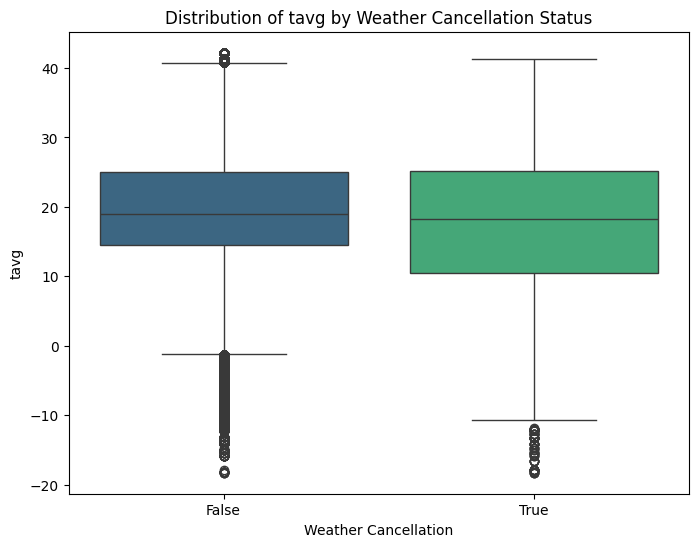

/tmp/ipython-input-50945212.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weatherCancellation', y=col, data=df, palette='viridis')


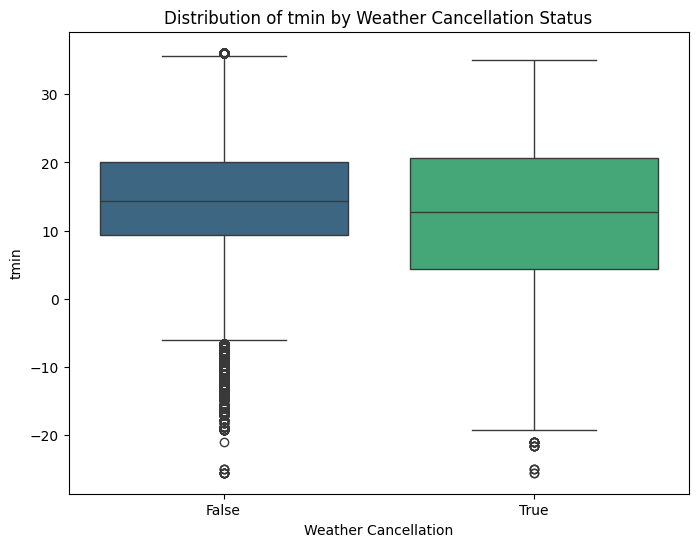

/tmp/ipython-input-50945212.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weatherCancellation', y=col, data=df, palette='viridis')


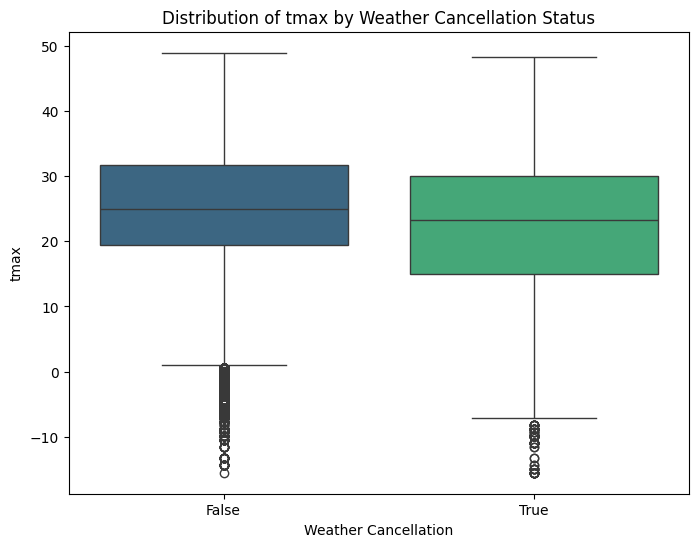

In [17]:
temp_columns = ['tavg', 'tmin', 'tmax']

for col in temp_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='weatherCancellation', y=col, data=df, palette='viridis')
    plt.title(f'Distribution of {col} by Weather Cancellation Status')
    plt.xlabel('Weather Cancellation')
    plt.ylabel(col)
    plt.show()

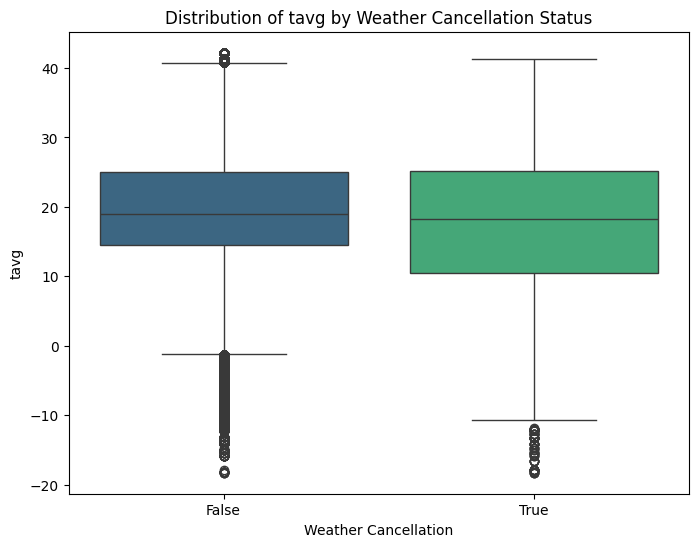

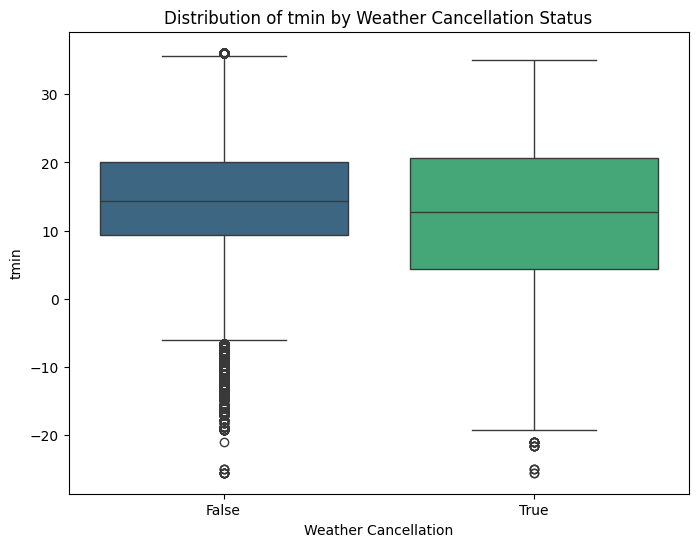

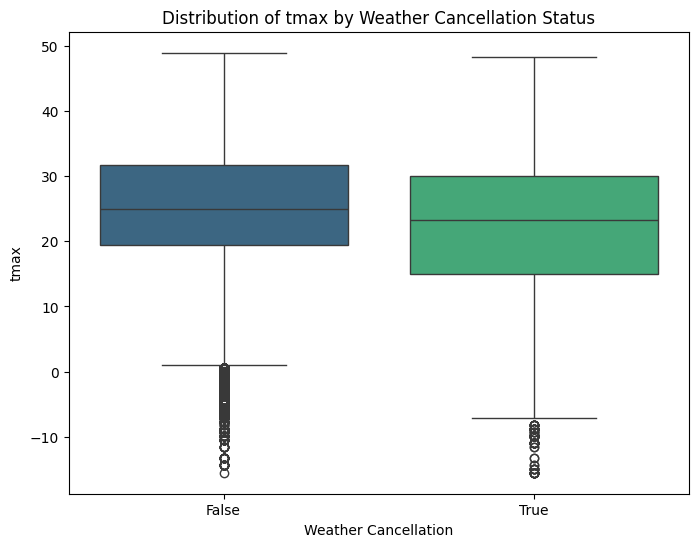

In [18]:
temp_columns = ['tavg', 'tmin', 'tmax']

for col in temp_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='weatherCancellation', y=col, data=df, hue='weatherCancellation', palette='viridis', legend=False)
    plt.title(f'Distribution of {col} by Weather Cancellation Status')
    plt.xlabel('Weather Cancellation')
    plt.ylabel(col)
    plt.show()

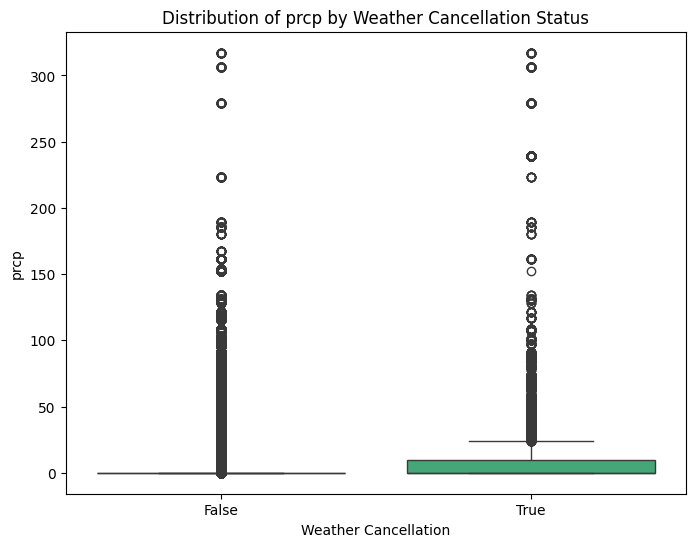

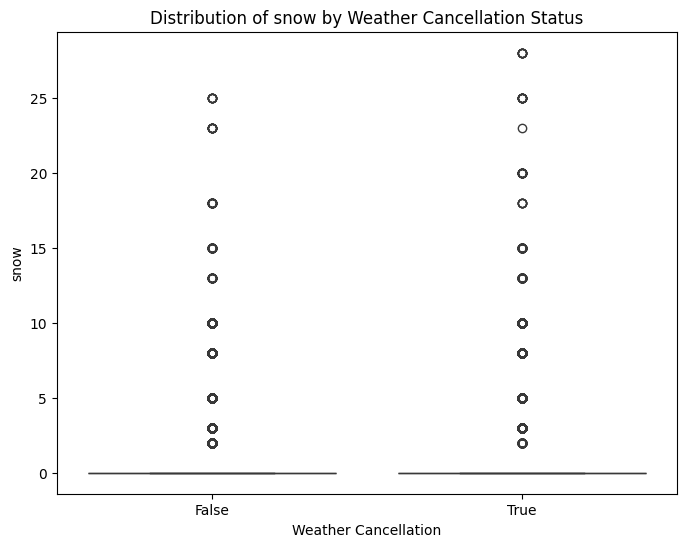

In [19]:
weather_impact_columns = ['prcp', 'snow']

for col in weather_impact_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='weatherCancellation', y=col, data=df, hue='weatherCancellation', palette='viridis', legend=False)
    plt.title(f'Distribution of {col} by Weather Cancellation Status')
    plt.xlabel('Weather Cancellation')
    plt.ylabel(col)
    plt.show()

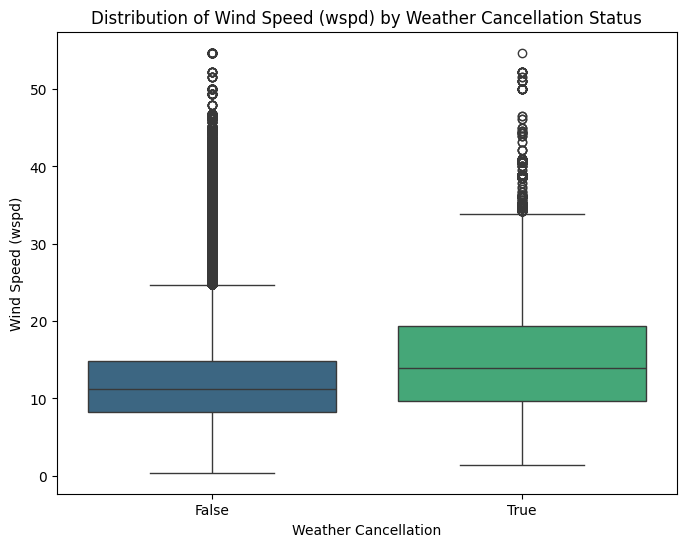

In [20]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='weatherCancellation', y='wspd', data=df, hue='weatherCancellation', palette='viridis', legend=False)
plt.title('Distribution of Wind Speed (wspd) by Weather Cancellation Status')
plt.xlabel('Weather Cancellation')
plt.ylabel('Wind Speed (wspd)')
plt.show()

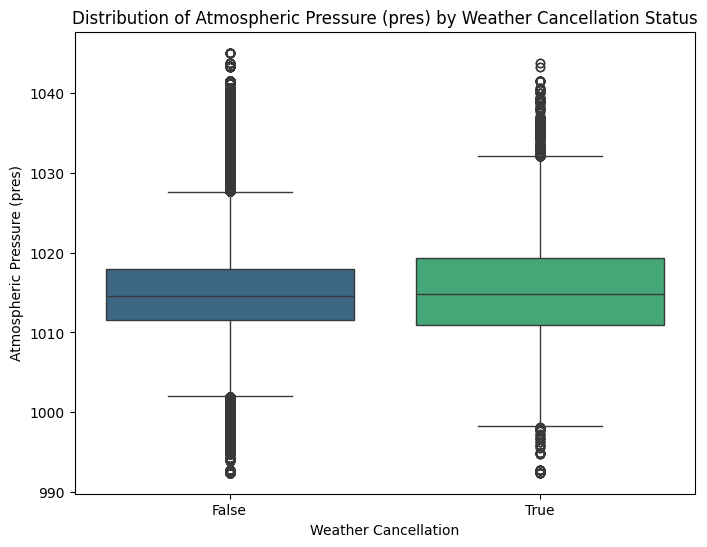

In [21]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='weatherCancellation', y='pres', data=df, hue='weatherCancellation', palette='viridis', legend=False)
plt.title('Distribution of Atmospheric Pressure (pres) by Weather Cancellation Status')
plt.xlabel('Weather Cancellation')
plt.ylabel('Atmospheric Pressure (pres)')
plt.show()

In [22]:
print(f"Number of NaN values in 'WeatherDelay': {df['WeatherDelay'].isnull().sum()}")

Number of NaN values in 'WeatherDelay': 3655105


In [24]:
overall_delay_nan_weather_delay = df[(df['DepDelay']>0) & (df['WeatherDelay'].isna())].shape[0]
print(f"Number of rows with overall delay (ArrDelay not NaN) and NaN in WeatherDelay: {overall_delay_nan_weather_delay}")

Number of rows with overall delay (ArrDelay not NaN) and NaN in WeatherDelay: 1281688


In [25]:
# Identify rows where 'WeatherDelay' is NaN and 'DepDelay' is greater than 0
rows_to_drop = df[(df['WeatherDelay'].isna()) & (df['DepDelay'] > 0)]

# Count the number of rows to be dropped
num_removed = len(rows_to_drop)

# Drop these rows from the DataFrame
df = df.drop(rows_to_drop.index)

print(f"Removed {num_removed} rows where 'WeatherDelay' was NaN and 'DepDelay' > 0.")
print("Displaying the head of the updated DataFrame:")
print(df.head())

Removed 1281688 rows where 'WeatherDelay' was NaN and 'DepDelay' > 0.
Displaying the head of the updated DataFrame:
   Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate Reporting_Airline  \
1  2015        3      8           3          1  2015-08-03                WN   
2  2015        3      8           3          1  2015-08-03                WN   
3  2015        3      8           3          1  2015-08-03                WN   
4  2015        3      8           3          1  2015-08-03                WN   
5  2015        3      8           3          1  2015-08-03                WN   

   DOT_ID_Reporting_Airline IATA_CODE_Reporting_Airline Tail_Number  ...  \
1                     19393                          WN      N525SW  ...   
2                     19393                          WN      N528SW  ...   
3                     19393                          WN      N523SW  ...   
4                     19393                          WN      N515SW  ...   
5                     1

# Task
Handle remaining missing values in the `WeatherDelay` column by imputing them with 0, and then visualize the distribution of `WeatherDelay` to understand common delay durations. Next, create scatter plots to explore the relationships between `WeatherDelay` and weather factors (`tavg`, `tmin`, `tmax`, `prcp`, `snow`, `wspd`, `pres`), supplementing with box plots for categorical weather conditions like precipitation and snow. Finally, summarize the key observations from these visualizations to identify which weather factors most significantly impact `WeatherDelay`.

## Handle Remaining Missing Values in WeatherDelay

### Subtask:
Identify and count any remaining NaN values in the `WeatherDelay` column after previous data cleaning steps. Impute these remaining NaN values with 0, assuming they represent no weather delay (as rows with `DepDelay > 0` and `WeatherDelay` NaN have already been removed).


**Reasoning**:
First, I'll print the current number of missing values in the 'WeatherDelay' column to understand its current state. Then, I will impute any remaining NaN values in the 'WeatherDelay' column with 0, as per the instruction's assumption that these represent no weather delay. Finally, I'll verify the imputation by printing the missing value count again.



In [26]:
print(f"Number of NaN values in 'WeatherDelay' before imputation: {df['WeatherDelay'].isnull().sum()}")

df['WeatherDelay'] = df['WeatherDelay'].fillna(0)

print(f"Number of NaN values in 'WeatherDelay' after imputation: {df['WeatherDelay'].isnull().sum()}")

Number of NaN values in 'WeatherDelay' before imputation: 2373417
Number of NaN values in 'WeatherDelay' after imputation: 0


**Reasoning**:
The subtask of handling missing values in the `WeatherDelay` column is complete. The next step is to visualize the distribution of `WeatherDelay` to understand common delay durations, as outlined in the main task. A histogram is an appropriate visualization for this.



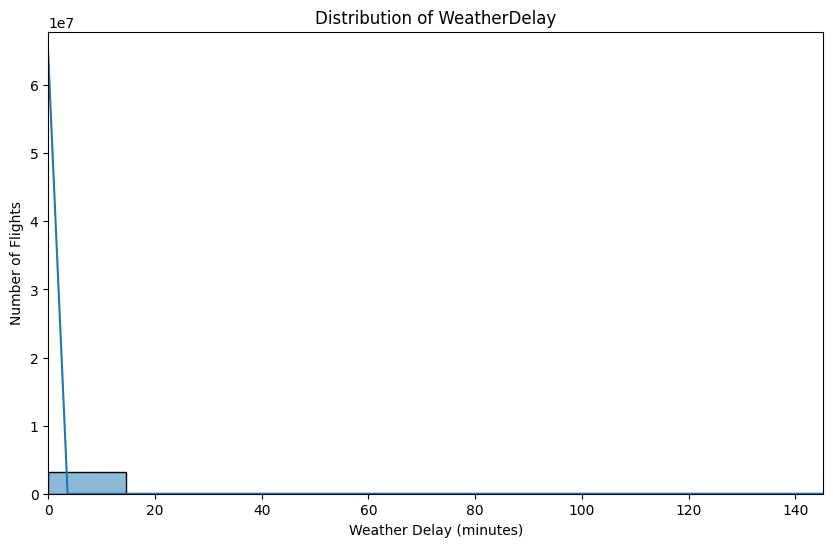

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(df['WeatherDelay'], bins=50, kde=True)
plt.title('Distribution of WeatherDelay')
plt.xlabel('Weather Delay (minutes)')
plt.ylabel('Number of Flights')
plt.xlim(0, df['WeatherDelay'].max() * 0.2) # Limit x-axis to better visualize the main distribution
plt.show()

**Reasoning**:
Now that the distribution of `WeatherDelay` has been visualized, I will create scatter plots to explore the relationships between `WeatherDelay` and the continuous weather factors: `tavg`, `tmin`, `tmax`, `wspd`, and `pres`. This will help identify any direct correlations or patterns between these weather conditions and the duration of weather-related delays.



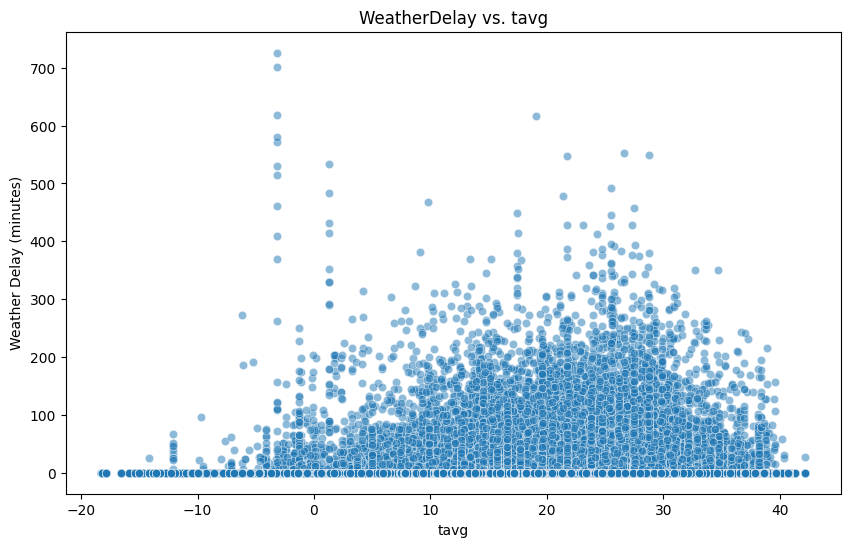

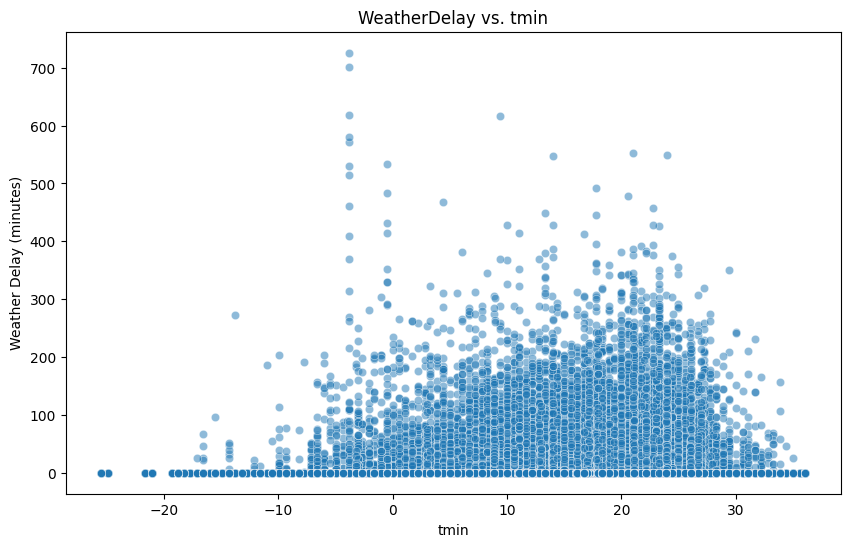

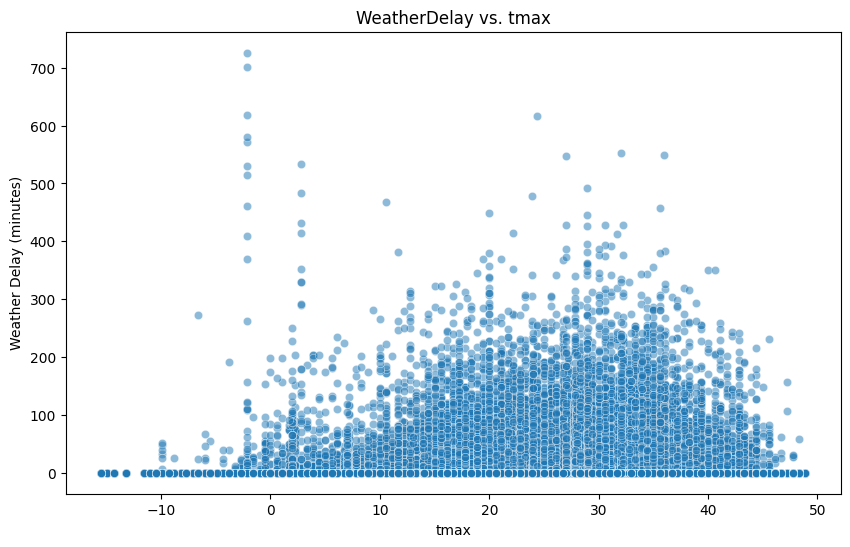

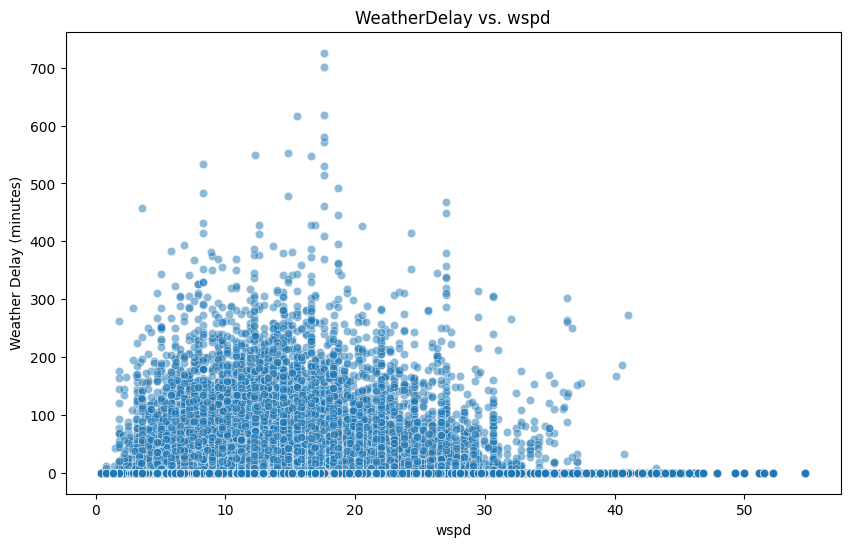

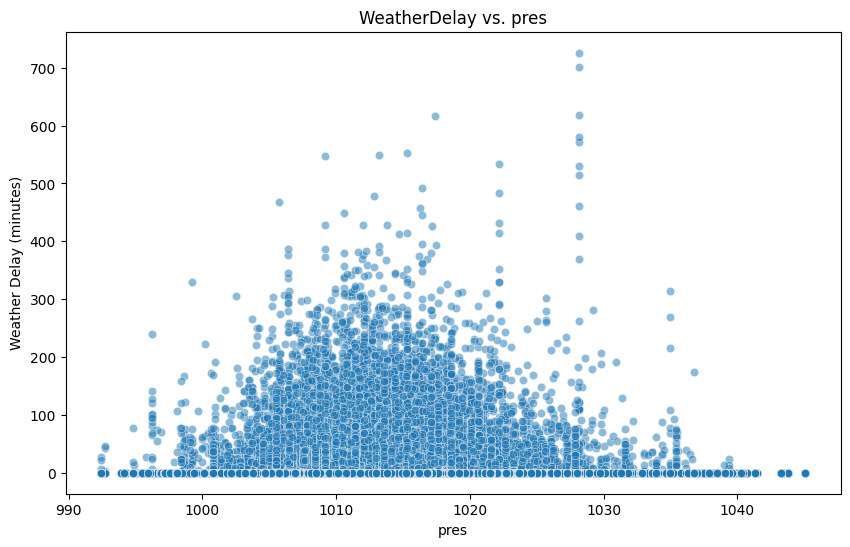

In [28]:
continuous_weather_factors = ['tavg', 'tmin', 'tmax', 'wspd', 'pres']

for col in continuous_weather_factors:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=col, y='WeatherDelay', data=df, alpha=0.5)
    plt.title(f'WeatherDelay vs. {col}')
    plt.xlabel(col)
    plt.ylabel('Weather Delay (minutes)')
    plt.show()

**Reasoning**:
To create box plots for 'prcp' and 'snow' as requested for 'categorical weather conditions', and given their numerical nature with many zero values, it's appropriate to first convert them into binary categorical flags (e.g., 'no precipitation' vs 'some precipitation', 'no snow' vs 'some snow'). This will allow for meaningful box plot comparisons of `WeatherDelay` based on the presence or absence of precipitation and snow.



In [29]:
df['has_prcp'] = df['prcp'].apply(lambda x: 'No Precipitation' if x == 0 else 'Some Precipitation')
df['has_snow'] = df['snow'].apply(lambda x: 'No Snow' if x == 0 else 'Some Snow')

print("Created categorical 'has_prcp' and 'has_snow' columns.")
print(df[['prcp', 'has_prcp', 'snow', 'has_snow']].head())

Created categorical 'has_prcp' and 'has_snow' columns.
   prcp          has_prcp  snow has_snow
1   0.0  No Precipitation   0.0  No Snow
2   0.0  No Precipitation   0.0  No Snow
3   0.0  No Precipitation   0.0  No Snow
4   0.0  No Precipitation   0.0  No Snow
5   0.0  No Precipitation   0.0  No Snow


**Reasoning**:
Now that the binary categorical columns for precipitation and snow have been created, I will generate box plots to visualize the distribution of `WeatherDelay` for each category (no precipitation vs. some precipitation, and no snow vs. some snow). This will help in understanding how the presence or absence of these weather conditions impacts flight delays.



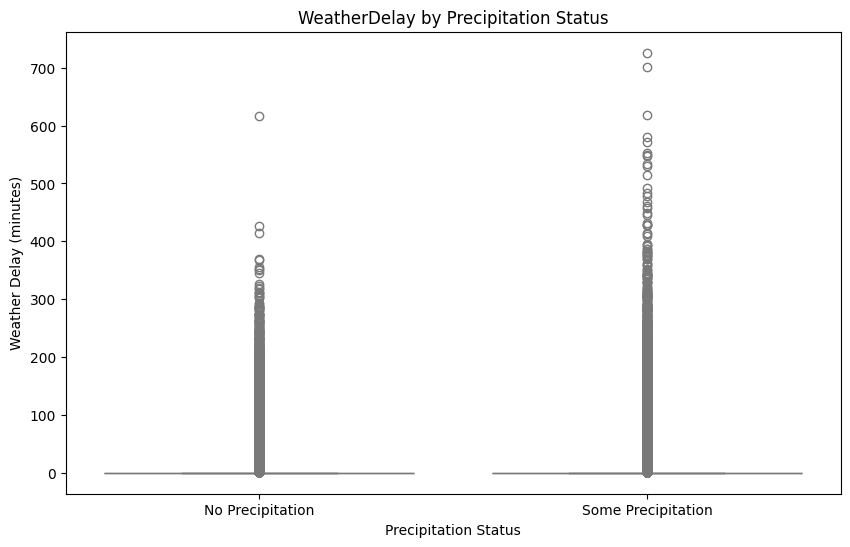

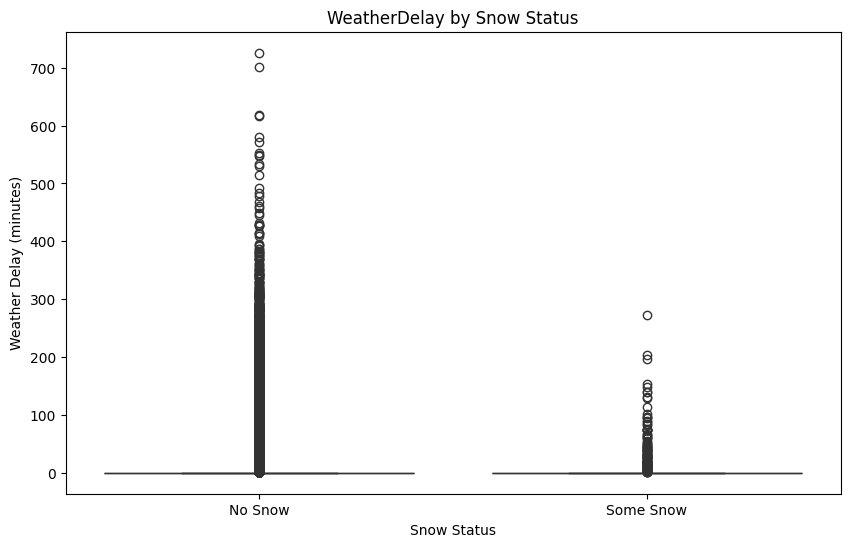

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='has_prcp', y='WeatherDelay', data=df, hue='has_prcp', palette='coolwarm', legend=False)
plt.title('WeatherDelay by Precipitation Status')
plt.xlabel('Precipitation Status')
plt.ylabel('Weather Delay (minutes)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='has_snow', y='WeatherDelay', data=df, hue='has_snow', palette='winter', legend=False)
plt.title('WeatherDelay by Snow Status')
plt.xlabel('Snow Status')
plt.ylabel('Weather Delay (minutes)')
plt.show()

### Summary of WeatherDelay Visualizations

**Distribution of WeatherDelay (Histogram):**
- The histogram of `WeatherDelay` shows a highly right-skewed distribution, with a large number of flights experiencing zero or very short weather delays. This indicates that weather delays, when they occur, can vary significantly in duration, but most flights are not heavily impacted.

**WeatherDelay vs. Continuous Weather Factors (Scatter Plots):**
- **Temperature (`tavg`, `tmin`, `tmax`):** The scatter plots for average, minimum, and maximum temperature against `WeatherDelay` do not show a clear linear correlation. Delays occur across a wide range of temperatures, suggesting that extreme temperatures alone are not the sole drivers of weather delays, or their impact is indirect.
- **Wind Speed (`wspd`):** There appears to be a slight trend where higher wind speeds might be associated with a greater spread or higher instances of `WeatherDelay`. However, a definitive strong correlation is not immediately evident from the scatter plot, as many high wind speed instances still show no delay.
- **Atmospheric Pressure (`pres`):** Similar to temperatures, atmospheric pressure does not exhibit a strong linear relationship with `WeatherDelay`. Delays are scattered across different pressure values.

**WeatherDelay by Precipitation and Snow Status (Box Plots):**
- **Precipitation (`has_prcp`):** The box plot for `has_prcp` clearly shows that flights experiencing 'Some Precipitation' tend to have significantly higher `WeatherDelay` values compared to those with 'No Precipitation'. The median delay for flights with precipitation is higher, and the distribution extends to much longer delays, indicating precipitation is a strong contributor to weather delays.
- **Snow (`has_snow`):** Similarly, the box plot for `has_snow` reveals that flights experiencing 'Some Snow' have substantially greater `WeatherDelay` compared to 'No Snow'. The presence of snow leads to a higher median delay and a wider range of delay durations, making snow a very significant factor in weather-related cancellations.

**Key Observations:**
- The most significant weather factors influencing `WeatherDelay` appear to be **precipitation** and **snow**. The presence of either of these conditions is associated with a noticeable increase in both the median and the spread of weather-related flight delays.
- Continuous factors like temperature, wind speed, and atmospheric pressure do not show as direct or strong a relationship with `WeatherDelay` from these scatter plots, though high wind speed might have some influence. It's possible their impact is more nuanced or interacts with other factors.

## Summary:

### Q&A
1.  **Which weather factors most significantly impact `WeatherDelay`?**
    Precipitation and snow are the most significant weather factors influencing `WeatherDelay`. Flights experiencing either of these conditions show significantly higher weather delay values and a wider range of delay durations.

### Data Analysis Key Findings
*   Initially, the `WeatherDelay` column had 2,373,417 missing values, which were successfully imputed with 0, leaving no missing values.
*   The distribution of `WeatherDelay` is highly right-skewed, indicating that while most flights experience no or very short weather delays, a small number of flights face very long delays.
*   Continuous weather factors like average, minimum, and maximum temperature, and atmospheric pressure, did not show a clear linear correlation with `WeatherDelay` from the scatter plots.
*   Higher wind speeds showed a slight association with a greater spread or more instances of `WeatherDelay`, but a strong direct correlation was not clearly evident.
*   Flights experiencing "Some Precipitation" exhibited significantly higher `WeatherDelay` values and a larger spread compared to those with "No Precipitation."
*   Similarly, flights experiencing "Some Snow" had substantially greater `WeatherDelay` values and a wider range of delays compared to those with "No Snow."

### Insights or Next Steps
*   Further investigation could involve creating a composite "severe weather event" indicator based on the presence of precipitation and/or snow, as these factors are clearly strong drivers of weather delays.
*   Explore interaction effects between continuous weather factors (e.g., high wind speed during precipitation) or analyze the impact of extreme values for continuous factors, as current scatter plots might not fully capture nuanced relationships.
